<a href="https://colab.research.google.com/github/sachumonpsajeev-cyber/VitalDb-Cardiac-Arrest-Prediction-TAN/blob/main/notebooks/VitalDB_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import Library

In [2]:
# Install VitalDB library with compatible pandas
!pip install vitaldb pandas==2.2.2 -q

# Import libraries
import vitaldb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 12.1 MB/s eta 0:00:00
✅ All libraries imported successfully!


# Load Case Information

In [3]:
# Load all case clinical information
cases = pd.read_csv('https://api.vitaldb.net/cases')

# Basic info
print(f"Total cases: {len(cases)}")
print(f"Total columns: {len(cases.columns)}")
print("\nFirst 5 cases:")
cases.head()

Total cases: 6388
Total columns: 74

First 5 cases:


,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100


#Explore the Data


In [4]:
# See all available columns
print("Available columns:")
print(cases.columns.tolist())

Available columns:
['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn', 'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca']


#Find Mortality Case

In [5]:
# Check mortality distribution
print("Mortality value counts:")
print(cases['death_inhosp'].value_counts())

# Separate survived vs died
survived = cases[cases['death_inhosp'] == 0]
died = cases[cases['death_inhosp'] == 1]

print(f"\nTotal survived: {len(survived)}")
print(f"Total died: {len(died)}")
print(f"Mortality rate: {len(died)/len(cases)*100:.2f}%")

Mortality value counts:
death_inhosp
0    6331
1      57
Name: count, dtype: int64

Total survived: 6331
Total died: 57
Mortality rate: 0.89%


#Load  Vital Signs For One Patient

In [7]:
# Load vital signs for first patient
# HR = Heart Rate
# ART_MBP = Mean Blood Pressure
# SpO2 = Oxygen Saturation

data = vitaldb.load_case(
    1,  # caseid
    ['Solar8000/HR',
     'Solar8000/ART_MBP',
     'Solar8000/SpO2'],
    interval=1
)

print("Shape of data:", data.shape)
print("\nFirst few rows:")
print(data[:5])

Shape of data: (10941, 3)

First few rows:
[[nan nan nan]
 [88. -8. nan]
 [nan nan nan]
 [87. -8. nan]
 [nan nan nan]]


#Visualize Vital Signs

Total data points: 10941
Non-empty rows: 5463

Basic statistics:
                HR          MBP  SpO2
count  5455.000000  5449.000000   0.0
mean     77.192667    81.859607   NaN
std      14.609980    42.272479   NaN
min      57.000000   -70.000000   NaN
25%      68.000000    66.000000   NaN
50%      74.000000    80.000000   NaN
75%      82.000000    93.000000   NaN
max     139.000000   346.000000   NaN


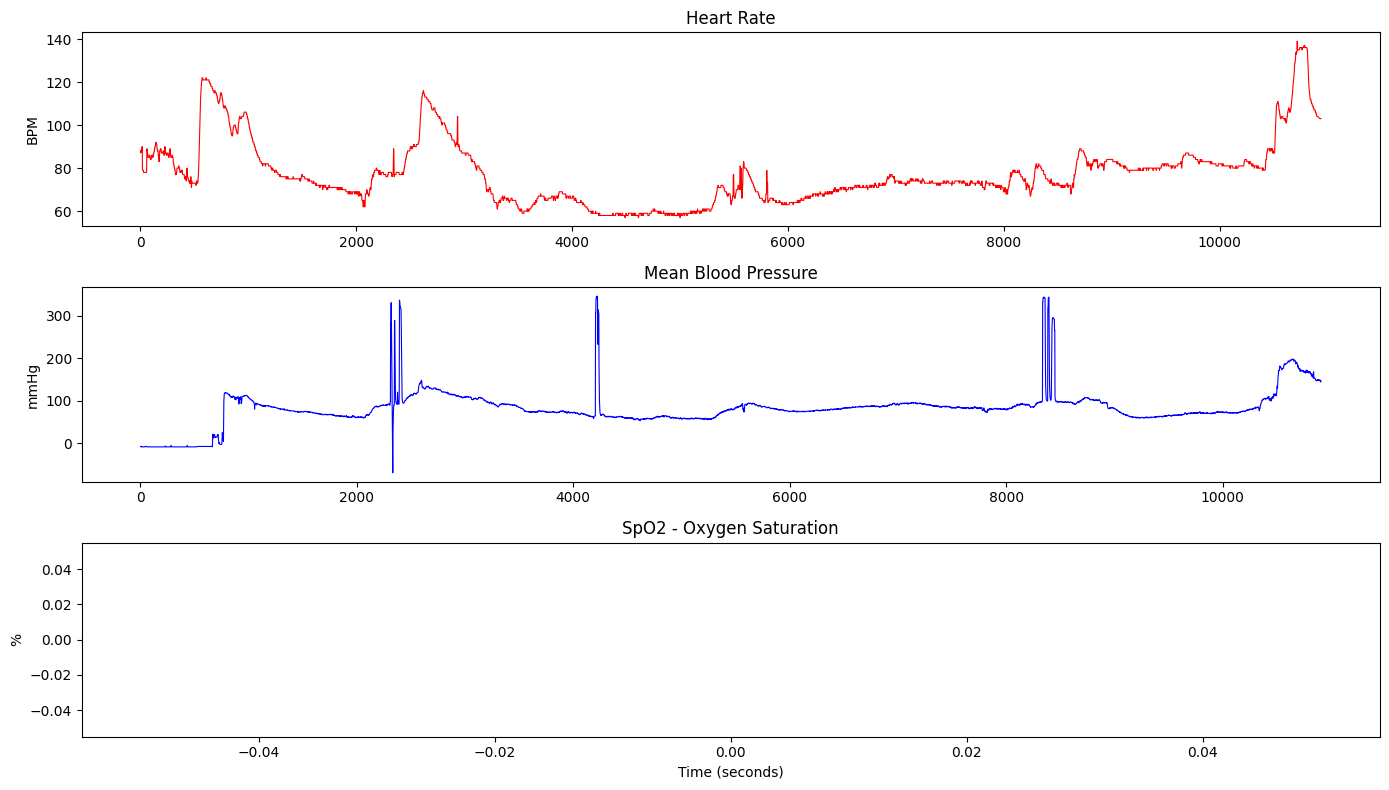

                 HR  MBP          SpO2
count  10464.000000  0.0  10250.000000
mean      85.745126  NaN     99.824488
std        4.579616  NaN      1.121171
min       73.000000  NaN     79.000000
25%       83.000000  NaN    100.000000
50%       85.000000  NaN    100.000000
75%       88.000000  NaN    100.000000
max      107.000000  NaN    100.000000


In [13]:
# Convert to pandas for better handling
df = pd.DataFrame(data, columns=['HR', 'MBP', 'SpO2'])

# Drop rows where ALL values are missing
df_clean = df.dropna(how='all')

print(f"Total data points: {len(df)}")
print(f"Non-empty rows: {len(df_clean)}")
print(f"\nBasic statistics:")
print(df_clean.describe())

# Plot only non-null data
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

axes[0].plot(df['HR'].dropna(), color='red', linewidth=0.8)
axes[0].set_title('Heart Rate')
axes[0].set_ylabel('BPM')

axes[1].plot(df['MBP'].dropna(), color='blue', linewidth=0.8)
axes[1].set_title('Mean Blood Pressure')
axes[1].set_ylabel('mmHg')

axes[2].plot(df['SpO2'].dropna(), color='green', linewidth=0.8)
axes[2].set_title('SpO2 - Oxygen Saturation')
axes[2].set_ylabel('%')

plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()
# Try different SpO2 track names
data2 = vitaldb.load_case(
    5,  # try a different patient
    ['Solar8000/HR',
     'Solar8000/ART_MBP',
     'Solar8000/PLETH_SPO2'],  # different SpO2 name
    interval=1
)

df2 = pd.DataFrame(data2, columns=['HR', 'MBP', 'SpO2'])
print(df2.describe())

#Load Track List

In [14]:
# See all available vital sign tracks
tracks = pd.read_csv('https://api.vitaldb.net/trks')

print(f"Total tracks available: {len(tracks)}")
print("\nSample tracks:")
tracks.head(10)

Total tracks available: 486449

Sample tracks:


,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
5,1,BIS/SQI,087670cd3f03109ff5028f268587a9801865afca
6,1,BIS/SR,5154b6395a8636ea82d0e2648f2957227f0ad816
7,1,BIS/TOTPOW,11785e179322dd451895c9d97f8b3c40720416b4
8,1,Primus/AWP,37cdb593a215fe148d994485a93c77d8cc6a6008
9,1,Primus/CO2,c39466fa9b7f231e1f26cdccb8ccf8fbde782459


#Save Cases Data For Later

In [15]:
# Save cases dataframe locally in Colab
cases.to_csv('vitaldb_cases.csv', index=False)
print("✅ Cases data saved as vitaldb_cases.csv")
print(f"File size: {cases.memory_usage().sum() / 1024:.2f} KB")

✅ Cases data saved as vitaldb_cases.csv
File size: 4627.26 KB
